# K Nearest Neighbors

> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manhattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

In [1]:
cd ..

/home/jovyan/cap


In [2]:
from sklearn.datasets import load_iris

% run lib/imports.py
% matplotlib inline

### Using the iris classification data set from sklearn for an example classification

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
species = list(iris.target_names)

columns = ['sepel_length', 'sepel_width', 'petal_length', 'petal_width']

In [7]:
iris_data = iris.data
iris_target = iris.target

In [8]:
# combining the data and target into one dataset for graphing
graph_data = pd.DataFrame(iris.data, columns=columns)
graph_data['species'] = pd.DataFrame(iris.target)

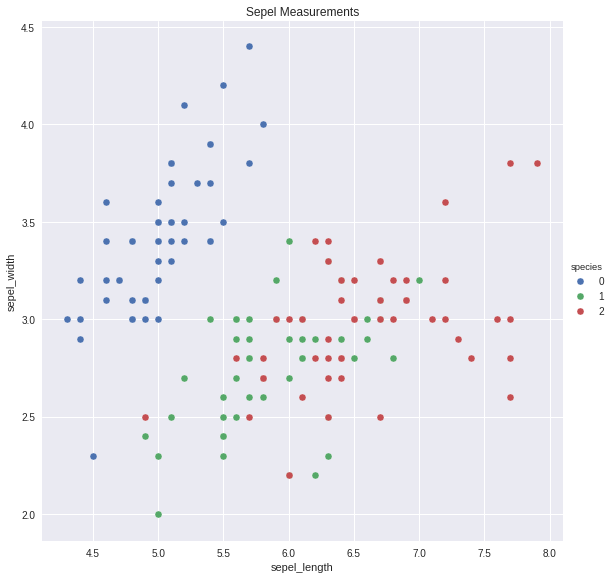

In [9]:
sns.pairplot(x_vars=['sepel_length'], y_vars=['sepel_width'], data=graph_data, hue='species', size=8, )
plt.title('Sepel Measurements')

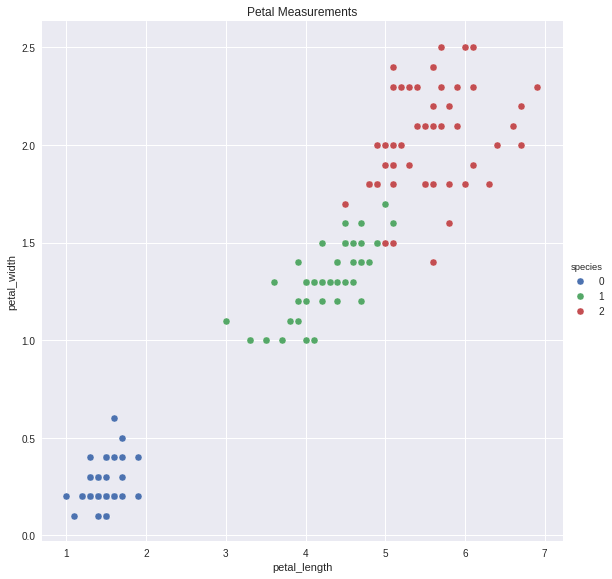

In [10]:
sns.pairplot(x_vars=['petal_length'], y_vars=['petal_width'], data=graph_data, hue='species', size=8)
plt.title('Petal Measurements')

## Comparing scikit-learn KNeighborsClassifier to Custom Nearest Neigbhors

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
ls

data/  INIT.ipynb  ipynb/  lib/  to_do.md


In [14]:
from lib.models.KNN import KNN

In [15]:
X_tr, X_ts, y_tr, y_ts = train_test_split(iris_data, iris_target, test_size=.5)

### Score

The scikit-learn model uses minkowski distance by default. However, with the default p setting at 2 this gives us the Euclidian distance 

In [16]:
SCI_knc = KNeighborsClassifier(n_neighbors=1)
SCI_knc.fit(X_tr, y_tr)
SCI_knc.score(X_ts, y_ts)

0.95999999999999996

In [17]:
# trying to eliminate the ravel warning
y_ts = np.array(y_ts)
y_ts = y_ts.ravel()

In [18]:
SCI_knc = KNeighborsClassifier(n_neighbors=7)
SCI_knc.fit(X_tr, y_tr)
SCI_knc.score(X_ts, y_ts)

0.97333333333333338

In [19]:
MY_knc = KNN(neighbors=7)
MY_knc.fit(X_tr, y_tr)
MY_knc.score(X_ts, y_ts)

97.33333333333334

In [23]:
FAST_knc = tst_alpha(neighbors=7)
FAST_knc.fit(X_tr, y_tr)
FAST_knc.score(X_ts, y_ts)

97.33333333333334

In [24]:
FASTER_knc = tst_beta(neighbors=7)
FASTER_knc.fit(X_tr, y_tr)
FASTER_knc.score(X_ts, y_ts)

97.33333333333334

### Performance

In [51]:
%%timeit
SCI_knc = KNeighborsClassifier(n_neighbors=7)
SCI_knc.fit(X_tr, y_tr)
SCI_knc.score(X_ts, y_ts)

794 µs ± 59.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
# %%timeit
# MY_knc = KNN(neighbors=7)
# MY_knc.fit(X_tr, y_tr)
# MY_knc.score(X_ts, y_ts)

12.9 ms ± 621 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%%timeit
FAST_knc = tst_alpha(neighbors=7)
FAST_knc.fit(X_tr, y_tr)
FAST_knc.score(X_ts, y_ts)

1.86 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%%timeit
FASTER_knc = tst_beta(neighbors=7)
FASTER_knc.fit(X_tr, y_tr)
FASTER_knc.score(X_ts, y_ts)

1.69 ms ± 83.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Memory

In [ ]:
pred = FASTER_knc.prediction(X_ts, y_ts)

In [ ]:
tf = pred == y_ts
tt = np.bincount(tf)
tt[1] / (tt[0] + tt[1])

In [39]:
tt = np.bincount(tf)
tt[1] / (tt[0] + tt[1])

0.97333333333333338

In [47]:
%%timeit
score(X_ts, y_ts)

2.03 µs ± 57 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [1]:
%%timeit
score(X_ts, y_ts)

NameError: name 'score' is not defined

In [ ]:
%%timeit
nbr_trg.shape[0]

In [ ]:
def dist(X):
    distance = np.empty((xts.shape[0], xtr.shape[0]))
    for i, xf in enumerate(xts):
        distance[i,:] = np.sqrt(np.square(xtr - xf).sum(axis=1))
        return distance


In [21]:

class tst_alpha():
    '''K-Nearest-Neighbors-Classifier
    
    OTHER STUFF
    -----------
    
    '''

    def __init__(self, neighbors=1, distance_metric='minkowski', p=2):
        self.n = neighbors
        self.metric = distance_metric
        self.p = p

    def fit(self, X, y):
        
        self.X_fit, self.y_fit = self.data_check(X,y)
        
    def find_distance(self, X):
        distance = np.empty((X.shape[0], self.X_fit.shape[0]))
        for i, x in enumerate(X):
            distance[i,:] = np.sqrt(np.square(self.X_fit - x).sum(axis=1))
        return distance
    
    
    def prediction(self,X,y):
    
        distance = self.find_distance(X)
    
        min_dist_index = [distance[i].argsort()[0:self.n] for i in range(distance.shape[0])]
#       dist_index_array = np.array(min_dist_index)
        nbr_trg = [self.y_fit[min_dist_index[i]] for i in range(len(min_dist_index))]
#       nbr_trg_array = np.array(nbr_trg)
    
        pred =[]
        for i in range(len(nbr_trg)):
            trg_freq, trg_id = np.unique(nbr_trg[i], return_counts=True)
            pred_index = trg_id.argsort()[-1]
            pred.append(trg_freq[pred_index])
    
        pred = np.array(pred)
        return pred

    def score(self, X,y):
        
        X,y = self.data_check(X,y)
    
        correct = 0
        incorrect = 0
    
        pred = self.prediction(X,y)
    
        for i in range(y.shape[0]):
            if y[i] == pred[i]:
                correct += 1
            else:
                incorrect += 1
    
        return (correct / (correct + incorrect)) * 100

    def data_check(self, X,y):
        '''
        Converts data to a numpy ndarray.
        '''

        if type(X) != np.ndarray:
            try:
                X = np.array(X)
            except:
                raise Exception('Failed to convert data to np.ndarray')
                
        if type(y) != np.ndarray:
            try:
                y = np.array(y)
            except:
                raise Exception('Failed to convert target to np.ndarray')

        return X, y
    
    def metric_check(self):
    
        if self.metric == 'manhattan':
            if self.p != 1:
                raise ValueError('Manhattan metric has been selected, p value will be set to 1.')
                self.p = 1
        elif self.metric == 'euclidean':
            if self.p != 2:
                raise ValueError('Euclidean metric has been selected, p value will be set to 2.')
                self.p = 2
        elif self.metric == 'minkowski':
            if self.p == 2:
                raise ValueError(
                'A p value of 2 has been selected with the Minkowski metric.\
                This is equivalent to the Euclidean metric.'
                )

In [55]:

class tst_beta():
    '''K-Nearest-Neighbors-Classifier
    
    OTHER STUFF
    -----------
    
    '''

    def __init__(self, neighbors=1, distance_metric='minkowski', p=2):
        self.n = neighbors
        self.metric = distance_metric
        self.p = p

    def fit(self, X, y):
        
        self.X_fit, self.y_fit = self.data_check(X,y)
        
    def find_distance(self, X):
        
        distance = np.empty((X.shape[0], self.X_fit.shape[0]))
        for i, x in enumerate(X):
            distance[i,:] = np.sqrt(np.square(self.X_fit - x).sum(axis=1))
        return distance
    
    
    def prediction(self, X, y):
    
        dist = self.find_distance(X)
        dist_ind = dist.argsort()
        nbr_ind = dist_ind[:, 0:self.n]
        nbr_trg = self.y_fit[nbr_ind]
        pred = np.empty(len(nbr_trg))
        
        for i, trg in enumerate(nbr_trg):
            ID, count = np.unique(trg, return_counts=True)
            pred_index = count.argsort()[-1]
            pred[i] = ID[pred_index]
            
        return pred

    def score(self, X, y):
        
        pred = self.prediction(X, y)
        true_false = pred == y
        tf_count = np.bincount(true_false)
        
        return tf_count[1] / (tf_count[0] + tf_count[1])

    def data_check(self, X,y):
        '''
        Converts data to a numpy ndarray.
        '''

        if type(X) != np.ndarray:
            try:
                X = np.array(X)
            except:
                raise Exception('Failed to convert data to np.ndarray')
                
        if type(y) != np.ndarray:
            try:
                y = np.array(y)
            except:
                raise Exception('Failed to convert target to np.ndarray')

        return X, y
    
    def metric_check(self):
    
        if self.metric == 'manhattan':
            if self.p != 1:
                raise ValueError('Manhattan metric has been selected, p value will be set to 1.')
                self.p = 1
        elif self.metric == 'euclidean':
            if self.p != 2:
                raise ValueError('Euclidean metric has been selected, p value will be set to 2.')
                self.p = 2
        elif self.metric == 'minkowski':
            if self.p == 2:
                raise ValueError(
                'A p value of 2 has been selected with the Minkowski metric.\
                This is equivalent to the Euclidean metric.'
                )

In [ ]:
    def find_distance(self, X):
        distance = np.empty((self.X_fit.shape[0], self.y_fit.shape[0]))
        for i, xf in enumerate(self.X_fit):
            distance[i,:] = np.sqrt(np.square(xf - X).sum(axis=1))
            return distance

In [ ]:
#### back burner
test speed difference between np.bins() and np.argsort

In [ ]:
%load_ext line_profiler
%lprun -f <function_name?> <function_name?>(<data?>)